<a href="https://colab.research.google.com/github/khushbooyadav6591/Advance_Machine_Learning/blob/main/Kyadav1_Advance_ML_Assignment1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



---


**Assignment** : Advance Machine Learning Assignment 1



---




*   **Author** : Khushboo Yadav
*   **Data**   : IMDB dataset
*   **Goal**   : To explore and extend original Neural Network model
￼￼￼


---















#**Original Model**



#### Key Features of the original model:-


* 16 nodes in each layer

* relu activation function

* Optimiser: rmsprop

* loss function: binary_crossentrophy

We are considering this model as original model and will be using its results for understanding of neural networks and performing some experimental changes to improve the performance of the model.



















In [11]:
#Importing libraries

import keras
keras.__version__
import pandas as pd
import matplotlib.pyplot as plt # plotting
import random


In [12]:
#Import imdb dataset
from keras.datasets import imdb


In [ ]:
#Import train and test data from imdb data
(train_data,train_labels),(test_data,test_labels)=imdb.load_data(num_words=10000)


In [14]:

# word_index is a dictionary mapping words to an integer index
word_index = imdb.get_word_index()
# We reverse it, mapping integer indices to words
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
# We decode the review; note that our indices were offset by 3
# because 0, 1 and 2 are reserved indices for "padding", "start of sequence", and "unknown".
decoded_review = ' '.join([reverse_word_index.get(i - 3, '?') for i in train_data[0]])

import numpy as np

def vectorize_sequences(sequences, dimension=10000):
    # Create an all-zero matrix of shape (len(sequences), dimension)
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.  # set specific indices of results[i] to 1s
    return results

# Our vectorized training data
x_train = vectorize_sequences(train_data)
# Our vectorized test data
x_test = vectorize_sequences(test_data)

# Our vectorized labels
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_17 (Dense)             (None, 16)                160016    
_________________________________________________________________
dense_18 (Dense)             (None, 16)                272       
_________________________________________________________________
dense_19 (Dense)             (None, 1)                 17        
Total params: 160,305
Trainable params: 160,305
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
30/30 [==============================] - 2s 40ms/step - loss: 0.5968 - accuracy: 0.6990 - val_loss: 0.3999 - val_accuracy: 0.8717
Epoch 2/20
30/30 [==============================] - 1s 32ms/step - loss: 0.3351 - accuracy: 0.9055 - val_loss: 0.3130 - val_accuracy: 0.8867
Epoch 3/20
30/30 [==============================] - 1s 31ms/step - loss: 0.2315 - accuracy: 0.93

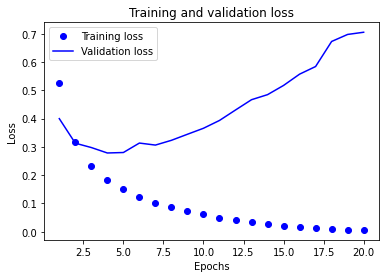

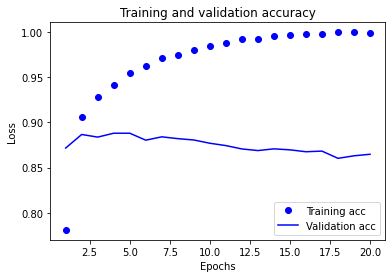

In [15]:
#Network Building
from keras import models
from keras import layers
import tensorflow as tf
tf.random.set_seed(7)

orig_model = models.Sequential()
orig_model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
orig_model.add(layers.Dense(16, activation='relu'))
orig_model.add(layers.Dense(1, activation='sigmoid'))

orig_model.summary()

# Configure Model: with the rmsprop optimizer and the binary_crossentropy loss function. 
orig_model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])


# Creating Validation Set: setting apart 10,000 samples from the original training data:

x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]


# Model Training
orig_history = orig_model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

orig_history_dict = orig_history.history
orig_history_dict.keys()

# Matplotlib to plot the training and validation loss side by side, as well as the training and validation accuracy:

import matplotlib.pyplot as plt

orig_accuracy = orig_history.history['accuracy']
orig_val_accuracy = orig_history.history['val_accuracy']
orig_loss = orig_history.history['loss']
orig_val_loss = orig_history.history['val_loss']

epochs = range(1, len(orig_accuracy) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, orig_loss, 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, orig_val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

plt.clf()   # clear figure
orig_acc_values = orig_history_dict['accuracy']
orig_val_acc_values = orig_history_dict['val_accuracy']

plt.plot(epochs, orig_accuracy, 'bo', label='Training acc')
plt.plot(epochs, orig_val_accuracy, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()


## **Observations**:
 * The training loss decreases with every epoch and the training accuracy increases with every epoch. 
 * The validation loss and accuracy seems rise at 4th Epoch
  
 * This model is performing   better on the training data but not on the validation data for both loss and accuracy.  This is an "overfitting" situation.
 * In order to do prevent overfitting we need to restrict the model before it starts to increase the loss value.

 When you overfit, you end up learning from your noise, and including it in your model.

Then, when the time comes to make predictions from other data, your accuracy goes down: the noise made its way into your model, but it was specific to your training data, so it hurts the accuracy of your model. Your model doesn't generalize: it is too specific to the data set you happened to choose to train.
## **Early Stop**:

In machine-learning there is an approach called early stop. In that approach you plot the error rate on training and validation data. The horizontal axis is the number of epochs and the vertical axis is the error rate. You should stop training when the error rate of validation data is minimum. Consequently if you increase the number of epochs, you will have an over-fitted model.

Therefore let's retrain the model with keeping only 4 Epochs and validate the results on the validation data.
 


In [16]:
#Retraining the model with 4 Epochs

tf.random.set_seed(8)

orig_retrained_model = models.Sequential()
orig_retrained_model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
orig_retrained_model.add(layers.Dense(16, activation='relu'))
orig_retrained_model.add(layers.Dense(1, activation='sigmoid'))


orig_retrained_model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

orig_retrained_model.fit(x_train, y_train, epochs=4, batch_size=512)
orig_results = orig_retrained_model.evaluate(x_test, y_test)

print(orig_results)

orig_retrained_model.predict(x_test)

Epoch 1/4
49/49 [==============================] - 2s 26ms/step - loss: 0.5551 - accuracy: 0.7433
Epoch 2/4
49/49 [==============================] - 1s 26ms/step - loss: 0.2788 - accuracy: 0.9096
Epoch 3/4
49/49 [==============================] - 1s 26ms/step - loss: 0.2075 - accuracy: 0.9259
Epoch 4/4
782/782 [==============================] - 1s 2ms/step - loss: 0.2915 - accuracy: 0.8842
[0.2914949357509613, 0.8842399716377258]


array([[0.18942767],
       [0.9997946 ],
       [0.9209652 ],
       ...,
       [0.14396375],
       [0.07375705],
       [0.61732715]], dtype=float32)

## **Observations**:
* After retraining the original model we can see that the performance has been improved,however we should try to improve  the below results:
* Average Accuracy on the retrained model= 88.42%
* Average Loss on the retrained model    = 29.14%



The number of hidden layers in a network architecture is related to model capacity.We can try to balance the overfitting by reducing the number of layer or by increasing the number of layer.


## **1.Changing the Hidden Layers from the original Model**:
Higher the model capacity, the more complex the functions that can be learned by the network.
Problems that require more than two hidden layers were rare prior to deep learning. Two or fewer layers will often suffice with simple data sets.

* Now let's try using one or three hidden layers, and see how doing so
affects validation and test accuracy.


*   1 Layer model
*   3 Layer model






Epoch 1/20
30/30 [==============================] - 2s 51ms/step - loss: 0.5604 - accuracy: 0.7261 - val_loss: 0.3893 - val_accuracy: 0.8594
Epoch 2/20
30/30 [==============================] - 1s 34ms/step - loss: 0.3271 - accuracy: 0.8971 - val_loss: 0.3114 - val_accuracy: 0.8888
Epoch 3/20
30/30 [==============================] - 1s 32ms/step - loss: 0.2449 - accuracy: 0.9260 - val_loss: 0.3046 - val_accuracy: 0.8759
Epoch 4/20
30/30 [==============================] - 1s 33ms/step - loss: 0.2042 - accuracy: 0.9373 - val_loss: 0.2795 - val_accuracy: 0.8883
Epoch 5/20
30/30 [==============================] - 1s 33ms/step - loss: 0.1634 - accuracy: 0.9528 - val_loss: 0.2744 - val_accuracy: 0.8879
Epoch 6/20
30/30 [==============================] - 1s 33ms/step - loss: 0.1399 - accuracy: 0.9607 - val_loss: 0.2865 - val_accuracy: 0.8857
Epoch 7/20
30/30 [==============================] - 1s 33ms/step - loss: 0.1251 - accuracy: 0.9665 - val_loss: 0.2802 - val_accuracy: 0.8874
Epoch 8/20
30

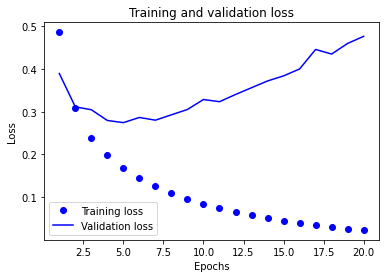

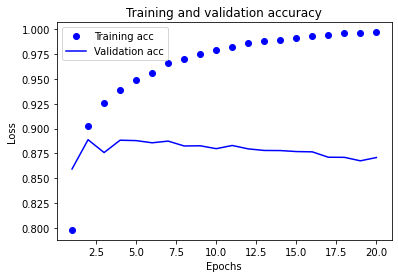

In [17]:

#model 2 : 1 hidden layer

#Network Building
from keras import models
from keras import layers

tf.random.set_seed(9)

smaller_model = models.Sequential()
smaller_model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
smaller_model.add(layers.Dense(1, activation='sigmoid'))

# Configure Model: with the rmsprop optimizer and the binary_crossentropy loss function. 

smaller_model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])


# Model Training
smaller_model_history = smaller_model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

smaller_model_history_dict = smaller_model_history.history
smaller_model_history_dict.keys()

#Plot the training and validation loss side by side, as well as the training and validation accuracy:
import matplotlib.pyplot as plt

smaller_model_history_accuracy = smaller_model_history.history['accuracy']
smaller_model_history_val_accuracy = smaller_model_history.history['val_accuracy']
smaller_model_history_loss = smaller_model_history.history['loss']
smaller_model_history_val_loss = smaller_model_history.history['val_loss']

epochs = range(1, len(smaller_model_history_accuracy) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, smaller_model_history_loss, 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, smaller_model_history_val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

plt.clf()   # clear figure

plt.plot(epochs, smaller_model_history_accuracy, 'bo', label='Training acc')
plt.plot(epochs, smaller_model_history_val_accuracy, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()


## **Observations**:-


* The model is performing better on the training data but not performing well on the validation data.
* After 4th epoch we are over optimizing the training data

* Let's retrained the model with epoch = 5 and check the results.


In [18]:
#Retraining the  smaller Model with 5 Epochs
tf.random.set_seed(12)

smaller_model = models.Sequential()
smaller_model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
smaller_model.add(layers.Dense(1, activation='sigmoid'))

smaller_model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

smaller_model.fit(x_train, y_train, epochs=5, batch_size=512)
smaller_model_results = smaller_model.evaluate(x_test, y_test)

print(smaller_model_results)

smaller_model.predict(x_test)

Epoch 1/5
49/49 [==============================] - 2s 27ms/step - loss: 0.5320 - accuracy: 0.7600
Epoch 2/5
49/49 [==============================] - 1s 27ms/step - loss: 0.2842 - accuracy: 0.9093
Epoch 3/5
49/49 [==============================] - 1s 27ms/step - loss: 0.2225 - accuracy: 0.9242
Epoch 4/5
49/49 [==============================] - 1s 27ms/step - loss: 0.1826 - accuracy: 0.9416
Epoch 5/5
782/782 [==============================] - 1s 2ms/step - loss: 0.2955 - accuracy: 0.8819
[0.2954699695110321, 0.881879985332489]


array([[0.16465464],
       [0.9998299 ],
       [0.79364634],
       ...,
       [0.12005672],
       [0.06393087],
       [0.5408848 ]], dtype=float32)








---



---


## **Results**:
* After retraining the original model we can see that the performance has been improved,however we should try to improve  the below results:
 * Average Accuracy on the new retrained model= 88.18% , original model=88.49%
 * Average Loss on the  new retrained model    = 29.54%, original model=29%

 * As per the result we dont find much difference in the performance of the model.


Let's try to increase the layer to 3 from 2 and check results .


---


---





Epoch 1/20
30/30 [==============================] - 2s 43ms/step - loss: 0.6442 - accuracy: 0.5738 - val_loss: 0.5247 - val_accuracy: 0.8549
Epoch 2/20
30/30 [==============================] - 1s 34ms/step - loss: 0.4207 - accuracy: 0.8877 - val_loss: 0.3500 - val_accuracy: 0.8724
Epoch 3/20
30/30 [==============================] - 1s 34ms/step - loss: 0.2593 - accuracy: 0.9241 - val_loss: 0.3014 - val_accuracy: 0.8838
Epoch 4/20
30/30 [==============================] - 1s 34ms/step - loss: 0.1840 - accuracy: 0.9463 - val_loss: 0.2910 - val_accuracy: 0.8837
Epoch 5/20
30/30 [==============================] - 1s 34ms/step - loss: 0.1397 - accuracy: 0.9607 - val_loss: 0.3095 - val_accuracy: 0.8769
Epoch 6/20
30/30 [==============================] - 1s 34ms/step - loss: 0.1152 - accuracy: 0.9661 - val_loss: 0.3095 - val_accuracy: 0.8850
Epoch 7/20
30/30 [==============================] - 1s 34ms/step - loss: 0.0818 - accuracy: 0.9796 - val_loss: 0.3248 - val_accuracy: 0.8843
Epoch 8/20
30

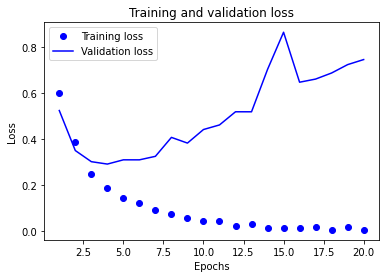

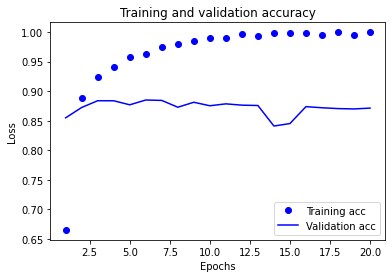

In [19]:

#model 3 : 3 layer,rest same

#Network Building

from keras import models
from keras import layers

tf.random.set_seed(10)

bigger_model = models.Sequential()
bigger_model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
bigger_model.add(layers.Dense(16, activation='relu'))
bigger_model.add(layers.Dense(16, activation='relu'))

bigger_model.add(layers.Dense(1, activation='sigmoid'))

# Configure Model: with the rmsprop optimizer and the binary_crossentropy loss function. 

bigger_model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])


#Training the Model
bigger_model_history = bigger_model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

bigger_model_history_dict = bigger_model_history.history
bigger_model_history_dict.keys()

#Plot the training and validation loss side by side, as well as the training and validation accuracy:
import matplotlib.pyplot as plt

bigger_model_history_accuracy = bigger_model_history.history['accuracy']
bigger_model_history_val_accuracy = bigger_model_history.history['val_accuracy']
bigger_model_history_loss = bigger_model_history.history['loss']
bigger_model_history_val_loss = bigger_model_history.history['val_loss']

epochs = range(1, len(bigger_model_history_accuracy) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, bigger_model_history_loss, 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, bigger_model_history_val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

plt.clf()   # clear figure


plt.plot(epochs, bigger_model_history_accuracy, 'bo', label='Training acc')
plt.plot(epochs, bigger_model_history_val_accuracy, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()


## **Observations**:
* It seems that accuracy has improved however the loss has increased leading to overfitting. 
* let's try to retrain the model with 4 epochs as the validation loss and accuracy seems rise after 4th Epoch.


In [20]:
#Retraining the  bigger model with 4 Epochs

bigger_model = models.Sequential()
bigger_model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
bigger_model.add(layers.Dense(16, activation='relu'))
bigger_model.add(layers.Dense(16, activation='relu'))
bigger_model.add(layers.Dense(1, activation='sigmoid'))

bigger_model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

bigger_model.fit(x_train, y_train, epochs=4, batch_size=512)
bigger_model_results = bigger_model.evaluate(x_test, y_test)

print(bigger_model_results)

bigger_model.predict(x_test)

Epoch 1/4
49/49 [==============================] - 2s 26ms/step - loss: 0.6032 - accuracy: 0.7081
Epoch 2/4
49/49 [==============================] - 1s 26ms/step - loss: 0.2984 - accuracy: 0.9032
Epoch 3/4
49/49 [==============================] - 1s 26ms/step - loss: 0.2067 - accuracy: 0.9288
Epoch 4/4
782/782 [==============================] - 1s 2ms/step - loss: 0.3130 - accuracy: 0.8794
[0.31297555565834045, 0.8794400095939636]


array([[0.18358701],
       [0.9999654 ],
       [0.98800844],
       ...,
       [0.10272911],
       [0.11742598],
       [0.82172674]], dtype=float32)

 

---



---



## **Results**:
* After retraining the new  model we can see that the performance has been improved,lets validate the results with the original model:
 * Average Accuracy on the new retrained model= 87.94% , original model=88.49%
 * Average Loss on the  new retrained model    = 31.29%, original model=29%

 * It seems we are in the wrong direction and need to explore  other methods to improve the performance of the model.


---



---




## **2.Changing the number of Units(neurons) in the hidden Layer**
Deciding the number of neurons in the hidden layers is a very important part of deciding your overall neural network architecture. Though these layers do not directly interact with the external environment, they have a tremendous influence on the final output. Both the number of hidden layers and the number of neurons in each of these hidden layers must be carefully considered.

Using too few neurons in the hidden layers will result in something called underfitting. Underfitting occurs when there are too few neurons in the hidden layers to adequately detect the signals in a complicated data set.

Using too many neurons in the hidden layers can result in several problems. First, too many neurons in the hidden layers may result in overfitting. Overfitting occurs when the neural network has so much information processing capacity that the limited amount of information contained in the training set is not enough to train all of the neurons in the hidden layers. 

Let's try using layers with more hidden units or fewer hidden units: 32 units, 64 units, and validate the results



Epoch 1/20
30/30 [==============================] - 2s 50ms/step - loss: 0.6060 - accuracy: 0.6934 - val_loss: 0.4219 - val_accuracy: 0.8522
Epoch 2/20
30/30 [==============================] - 1s 32ms/step - loss: 0.3584 - accuracy: 0.8909 - val_loss: 0.3271 - val_accuracy: 0.8846
Epoch 3/20
30/30 [==============================] - 1s 32ms/step - loss: 0.2602 - accuracy: 0.9237 - val_loss: 0.3127 - val_accuracy: 0.8750
Epoch 4/20
30/30 [==============================] - 1s 33ms/step - loss: 0.2062 - accuracy: 0.9354 - val_loss: 0.2854 - val_accuracy: 0.8861
Epoch 5/20
30/30 [==============================] - 1s 32ms/step - loss: 0.1660 - accuracy: 0.9489 - val_loss: 0.2770 - val_accuracy: 0.8892
Epoch 6/20
30/30 [==============================] - 1s 32ms/step - loss: 0.1414 - accuracy: 0.9578 - val_loss: 0.2848 - val_accuracy: 0.8871
Epoch 7/20
30/30 [==============================] - 1s 32ms/step - loss: 0.1162 - accuracy: 0.9673 - val_loss: 0.2881 - val_accuracy: 0.8866
Epoch 8/20
30

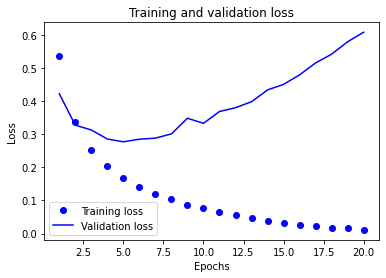

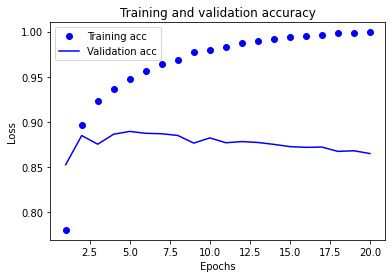

In [21]:
#Model 4 = less nodes
#Building Network
tf.random.set_seed(11)

from keras import models
from keras import layers

lessunits_model = models.Sequential()
lessunits_model.add(layers.Dense(8, activation='relu', input_shape=(10000,)))
lessunits_model.add(layers.Dense(8, activation='relu'))
lessunits_model.add(layers.Dense(1, activation='sigmoid'))

# Configure Model: with the rmsprop optimizer and the binary_crossentropy loss function. 

lessunits_model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

#Training the Model
lessunits_model_history = lessunits_model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

lessunits_model_history_dict = lessunits_model_history.history
lessunits_model_history_dict.keys()

# Plot the training and validation loss side by side, as well as the training and validation accuracy:

import matplotlib.pyplot as plt

lessunits_model_history_accuracy = lessunits_model_history.history['accuracy']
lessunits_model_history_val_accuracy = lessunits_model_history.history['val_accuracy']
lessunits_model_history_loss = lessunits_model_history.history['loss']
lessunits_model_history_val_loss = lessunits_model_history.history['val_loss']

epochs = range(1, len(lessunits_model_history_accuracy) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, lessunits_model_history_loss, 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, lessunits_model_history_val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

plt.clf()   # clear figure

plt.plot(epochs, lessunits_model_history_accuracy, 'bo', label='Training acc')
plt.plot(epochs, lessunits_model_history_val_accuracy, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()


### **2.1 Observations**:-
* Afer reducing the units , we can see some  positive changes in the results of the charts for accuracy and loss.
* As per the results ,It seems that with the increase in the epochs the difference in the **loss** for training and validation has increased, however accuracy seems to be improved.
* At **Epoch 5** , we are over optimizing the training data. Lets retrain the model with epoch=5 and validate the results.




In [22]:
#Retraining the LessUnit_Model with 5 Epochs
tf.random.set_seed(13)

lessunits_model = models.Sequential()
lessunits_model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
lessunits_model.add(layers.Dense(16, activation='relu'))
lessunits_model.add(layers.Dense(1, activation='sigmoid'))

lessunits_model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

lessunits_model.fit(x_train, y_train, epochs=5, batch_size=512)
lessunits_model_results = lessunits_model.evaluate(x_test, y_test)

print(lessunits_model_results)

lessunits_model.predict(x_test)

Epoch 1/5
49/49 [==============================] - 2s 27ms/step - loss: 0.5410 - accuracy: 0.7499
Epoch 2/5
49/49 [==============================] - 1s 26ms/step - loss: 0.2660 - accuracy: 0.9058
Epoch 3/5
49/49 [==============================] - 1s 27ms/step - loss: 0.1945 - accuracy: 0.9327
Epoch 4/5
49/49 [==============================] - 1s 27ms/step - loss: 0.1621 - accuracy: 0.9448
Epoch 5/5
782/782 [==============================] - 1s 2ms/step - loss: 0.3162 - accuracy: 0.8795
[0.3162168562412262, 0.8794800043106079]


array([[0.16791207],
       [0.99993896],
       [0.89237595],
       ...,
       [0.1307385 ],
       [0.0449706 ],
       [0.8024087 ]], dtype=float32)



---



---


## **2.2 Results**:
* After retraining the new  model we can see that the performance has remained almost same ,lets validate the results with the original model:

  * Average Accuracy on the new retrained model= 87.94% , original model=88.49%
  * Average Loss on the  new retrained model    = 31.62%, original model=29%

* This model has not improved the performance.This results from original model and new model are similar.


---



---






Epoch 1/20
30/30 [==============================] - 1s 40ms/step - loss: 0.1209 - accuracy: 0.9578 - val_loss: 0.1726 - val_accuracy: 0.9318
Epoch 2/20
30/30 [==============================] - 1s 33ms/step - loss: 0.1019 - accuracy: 0.9669 - val_loss: 0.1430 - val_accuracy: 0.9489
Epoch 3/20
30/30 [==============================] - 1s 33ms/step - loss: 0.0830 - accuracy: 0.9747 - val_loss: 0.1570 - val_accuracy: 0.9437
Epoch 4/20
30/30 [==============================] - 1s 33ms/step - loss: 0.0708 - accuracy: 0.9791 - val_loss: 0.1808 - val_accuracy: 0.9344
Epoch 5/20
30/30 [==============================] - 1s 35ms/step - loss: 0.0602 - accuracy: 0.9823 - val_loss: 0.1957 - val_accuracy: 0.9296
Epoch 6/20
30/30 [==============================] - 1s 33ms/step - loss: 0.0466 - accuracy: 0.9893 - val_loss: 0.2233 - val_accuracy: 0.9238
Epoch 7/20
30/30 [==============================] - 1s 33ms/step - loss: 0.0413 - accuracy: 0.9892 - val_loss: 0.2666 - val_accuracy: 0.9107
Epoch 8/20
30

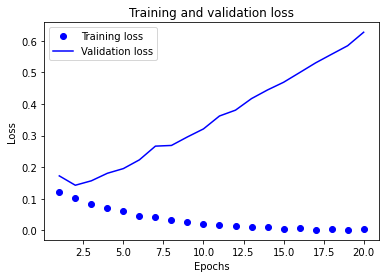

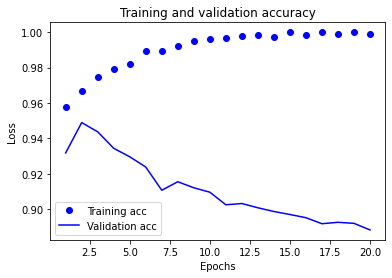

In [23]:
#Model 7 = more nodes
#Building Network
import tensorflow as tf

tf.random.set_seed(27)

from keras import models
from keras import layers

moreunits_model = models.Sequential()
moreunits_model.add(layers.Dense(32, activation='relu', input_shape=(10000,)))
moreunits_model.add(layers.Dense(32, activation='relu'))
moreunits_model.add(layers.Dense(1, activation='sigmoid'))

# Configure Model: with the rmsprop optimizer and the binary_crossentropy loss function. 

moreunits_model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])



#Creating Validation Set:setting apart 10,000 samples from the original training data:


#Training the Model
moreunits_model_history = lessunits_model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

moreunits_model_history_dict = moreunits_model_history.history
moreunits_model_history_dict.keys()

# Plot the training and validation loss side by side, as well as the training and validation accuracy:

import matplotlib.pyplot as plt

moreunits_model_history_accuracy = moreunits_model_history.history['accuracy']
moreunits_model_history_val_accuracy = moreunits_model_history.history['val_accuracy']
moreunits_model_history_loss = moreunits_model_history.history['loss']
moreunits_model_history_val_loss = moreunits_model_history.history['val_loss']

epochs = range(1, len(moreunits_model_history_accuracy) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, moreunits_model_history_loss, 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, moreunits_model_history_val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

plt.clf()   

plt.plot(epochs, moreunits_model_history_accuracy, 'bo', label='Training acc')
plt.plot(epochs, moreunits_model_history_val_accuracy, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

### **2.3 Observations**:
* The bigger network starts overfitting almost right away, after just one epoch, and overfitting seems to be very high in this case.
* At **Epoch 3** , we are over optimizing the training data. Lets retrain the model with epoch=3 and validate the results.



In [24]:
#Retraining the moreunit_Model with 2 Epochs
tf.random.set_seed(13)

moreunits_model = models.Sequential()
moreunits_model.add(layers.Dense(32, activation='relu', input_shape=(10000,)))
moreunits_model.add(layers.Dense(32, activation='relu'))
moreunits_model.add(layers.Dense(1, activation='sigmoid'))

moreunits_model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

moreunits_model.fit(x_train, y_train, epochs=3, batch_size=512)
moreunits_model_results = lessunits_model.evaluate(x_test, y_test)

print(moreunits_model_results)

moreunits_model.predict(x_test)

Epoch 1/3
49/49 [==============================] - 2s 32ms/step - loss: 0.5217 - accuracy: 0.7492
Epoch 2/3
49/49 [==============================] - 2s 31ms/step - loss: 0.2493 - accuracy: 0.9070
Epoch 3/3
782/782 [==============================] - 1s 2ms/step - loss: 0.9577 - accuracy: 0.8473
[0.9577019810676575, 0.847320020198822]


array([[0.26031265],
       [0.9999625 ],
       [0.9906814 ],
       ...,
       [0.24387652],
       [0.14118788],
       [0.86098605]], dtype=float32)



---



---


## **2.4 Results**:
* After retraining the new  model we can see that the performance for validation loss has down and for accuracy has reduced a little bit  ,lets validate the results with the original model:

  * Average Accuracy on the new retrained model= 84.73% , original model=88.49%
  * Average Loss on the  new retrained model    = 95%, original model=29%


---



---


## **3. Changing the Loss function to MSE from Binary Cross-Entropy Loss**
### **Binary Cross-Entropy**
* Cross-entropy is the default loss function to use for binary classification problems.
* It is intended for use with binary classification where the target values are in the set {0, 1}.

### How it works?

Cross-entropy will calculate a score that summarizes the **average difference between the actual and predicted probability distributions for predicting class 1.** The score is minimized and a **perfect cross-entropy value is 0**.

Cross-entropy can be specified as the loss function in Keras by specifying ‘binary_crossentropy‘ when compiling the model.

### **Mean Squared Error Loss**

* The Mean Squared Error, or MSE, loss is the default loss to use for regression problems.

### How it works?

Mean squared error is calculated as the **average of the squared differences between the predicted and actual values**. The result is always positive regardless of the sign of the predicted and actual values and **a perfect value is 0.0.** The squaring means that larger mistakes result in more error than smaller mistakes, meaning that the **model is punished for making larger mistakes.**

The mean squared error loss function can be used in Keras by specifying ‘mse‘ or ‘mean_squared_error‘ as the loss function when compiling the model.


*Reference*:
https://machinelearningmastery.com/how-to-choose-loss-functions-when-training-deep-learning-neural-networks/


Let's try to use MSE loss function instead of binary_crossentropy loss function and check results .

Epoch 1/20
30/30 [==============================] - 2s 54ms/step - loss: 0.2049 - accuracy: 0.7077 - val_loss: 0.1384 - val_accuracy: 0.8224
Epoch 2/20
30/30 [==============================] - 2s 51ms/step - loss: 0.1017 - accuracy: 0.8974 - val_loss: 0.0935 - val_accuracy: 0.8872
Epoch 3/20
30/30 [==============================] - 1s 35ms/step - loss: 0.0666 - accuracy: 0.9303 - val_loss: 0.0853 - val_accuracy: 0.8892
Epoch 4/20
30/30 [==============================] - 1s 36ms/step - loss: 0.0495 - accuracy: 0.9500 - val_loss: 0.0843 - val_accuracy: 0.8875
Epoch 5/20
30/30 [==============================] - 1s 34ms/step - loss: 0.0410 - accuracy: 0.9594 - val_loss: 0.0888 - val_accuracy: 0.8796
Epoch 6/20
30/30 [==============================] - 1s 35ms/step - loss: 0.0325 - accuracy: 0.9669 - val_loss: 0.0871 - val_accuracy: 0.8819
Epoch 7/20
30/30 [==============================] - 1s 36ms/step - loss: 0.0256 - accuracy: 0.9760 - val_loss: 0.0956 - val_accuracy: 0.8749
Epoch 8/20
30

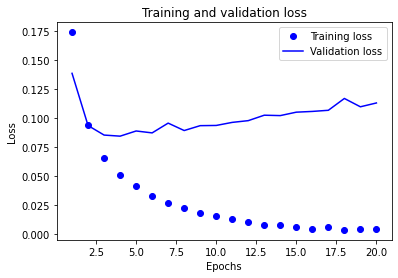

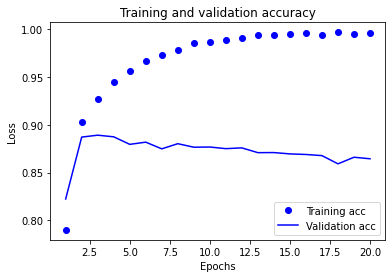

In [25]:
#Model 5 = MSE loss function

#Building the network
from keras import models
from keras import layers
tf.random.set_seed(14)

mse_model = models.Sequential()
mse_model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
mse_model.add(layers.Dense(16, activation='relu'))
mse_model.add(layers.Dense(1, activation='sigmoid'))



# Configure Model: with the rmsprop optimizer and the mean_squared_error loss function. 

mse_model.compile(optimizer='rmsprop',
              loss='mean_squared_error',
              metrics=['accuracy'])



#Train the Model
mse_model_history = mse_model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

mse_model_history_dict = mse_model_history.history
mse_model_history_dict.keys()

#Plot the training and validation loss side by side, as well as the training and validation accuracy:

import matplotlib.pyplot as plt

mse_model_history_accuracy = mse_model_history.history['accuracy']
mse_model_history_val_accuracy = mse_model_history.history['val_accuracy']
mse_model_history_loss = mse_model_history.history['loss']
mse_model_history_val_loss = mse_model_history.history['val_loss']

epochs = range(1, len(mse_model_history_accuracy) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, mse_model_history_loss, 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, mse_model_history_val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

plt.clf()   # clear figure


plt.plot(epochs, mse_model_history_accuracy, 'bo', label='Training acc')
plt.plot(epochs, mse_model_history_val_accuracy, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()



### **3.1 Observations**:-
* Afer increasing the units , we can see some  positive changes in the results of the charts for accuracy and loss.
* As per the results ,It seems that with the increase in the epochs the difference in the **loss** for training and validation has increased, however accuracy seems to be improved.
* At **Epoch 4** , we are over optimizing the training data. Lets retrain the model with epoch=5 and validate the results.



In [26]:
#Retraining the MSE Model 
tf.random.set_seed(15)

mse_model = models.Sequential()
mse_model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
mse_model.add(layers.Dense(16, activation='relu'))
mse_model.add(layers.Dense(1, activation='sigmoid'))

mse_model.compile(optimizer='rmsprop',
              loss='mean_squared_error',
              metrics=['accuracy'])

mse_model.fit(x_train, y_train, epochs=4, batch_size=512)
mse_model_results = mse_model.evaluate(x_test, y_test)

print(mse_model_results)

mse_model.predict(x_test)

Epoch 1/4
49/49 [==============================] - 2s 28ms/step - loss: 0.1982 - accuracy: 0.7214
Epoch 2/4
49/49 [==============================] - 1s 27ms/step - loss: 0.0898 - accuracy: 0.9073
Epoch 3/4
49/49 [==============================] - 1s 27ms/step - loss: 0.0607 - accuracy: 0.9327
Epoch 4/4
782/782 [==============================] - 1s 2ms/step - loss: 0.0930 - accuracy: 0.8750
[0.09295962750911713, 0.8750399947166443]


array([[0.12203729],
       [0.9929116 ],
       [0.6891459 ],
       ...,
       [0.11237174],
       [0.06757283],
       [0.48700517]], dtype=float32)




---



---


## **3.2 Results**:
The use of MSE function has definately brought some changes in the result and perfromance .


* After retraining the new  model we can see that the performance has improved for validation loss and accuracy ,lets validate the results with the original model:

  * Average Accuracy on the new retrained model= 87.5% , original model=88.49%
  * Average Loss on the  new retrained model    = 9.2%, original model=29%
* So far the best performance has  come from MSE model. 





---



---
# **4.Changing Activation function to Tanh from Relu**


**Tanh**

Tanh is also a very popular and widely used activation function.

It is nonlinear in nature and it is bound to **range (-1, 1)**. The gradient is stronger for tanh than sigmoid ( derivatives are steeper).


ReLu is l**ess computationally expensive than tanh and sigmoid** because it involves simpler mathematical operations. That is a good point to consider when we are designing deep neural nets.

*Reference*:https://www.aitude.com/comparison-of-sigmoid-tanh-and-relu-activation-functions/


Let's try to use tanh activation function instead of relu activation function and validate the results:


Epoch 1/20
30/30 [==============================] - 2s 43ms/step - loss: 0.5624 - accuracy: 0.7215 - val_loss: 0.3587 - val_accuracy: 0.8751
Epoch 2/20
30/30 [==============================] - 1s 36ms/step - loss: 0.2922 - accuracy: 0.9084 - val_loss: 0.2946 - val_accuracy: 0.8842
Epoch 3/20
30/30 [==============================] - 1s 36ms/step - loss: 0.1981 - accuracy: 0.9382 - val_loss: 0.2734 - val_accuracy: 0.8889
Epoch 4/20
30/30 [==============================] - 1s 36ms/step - loss: 0.1452 - accuracy: 0.9550 - val_loss: 0.2863 - val_accuracy: 0.8861
Epoch 5/20
30/30 [==============================] - 1s 36ms/step - loss: 0.1096 - accuracy: 0.9668 - val_loss: 0.3112 - val_accuracy: 0.8807
Epoch 6/20
30/30 [==============================] - 1s 36ms/step - loss: 0.0846 - accuracy: 0.9742 - val_loss: 0.4029 - val_accuracy: 0.8639
Epoch 7/20
30/30 [==============================] - 1s 36ms/step - loss: 0.0685 - accuracy: 0.9801 - val_loss: 0.3846 - val_accuracy: 0.8775
Epoch 8/20
30

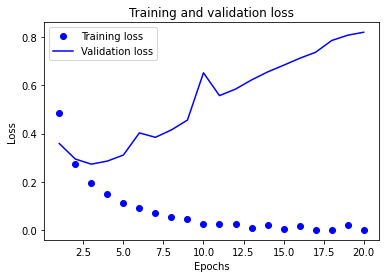

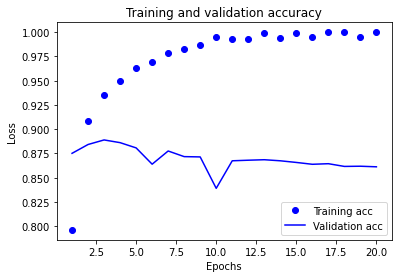

In [27]:
#Model 6 =tanh
#Buidling the Network
from keras import models
from keras import layers
tf.random.set_seed(16)

tanh_model = models.Sequential()
tanh_model.add(layers.Dense(16, activation='tanh', input_shape=(10000,)))
tanh_model.add(layers.Dense(16, activation='tanh'))
tanh_model.add(layers.Dense(1, activation='sigmoid'))

# Configure Model: with the rmsprop optimizer and the binary_crossentropy loss function. 

tanh_model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])





# Training the Model
tanh_model_history = tanh_model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

tanh_model_history_dict = tanh_model_history.history
tanh_model_history_dict.keys()

#Plot the training and validation loss side by side, as well as the training and validation accuracy:

import matplotlib.pyplot as plt

tanh_model_history_accuracy = tanh_model_history.history['accuracy']
tanh_model_history_val_accuracy = tanh_model_history.history['val_accuracy']
tanh_model_history_loss = tanh_model_history.history['loss']
tanh_model_history_val_loss = tanh_model_history.history['val_loss']

epochs = range(1, len(tanh_model_history_accuracy) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, tanh_model_history_loss, 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, tanh_model_history_val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

plt.clf()   # clear figure

plt.plot(epochs, tanh_model_history_accuracy, 'bo', label='Training acc')
plt.plot(epochs, tanh_model_history_val_accuracy, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()


### **4.1 Observations**:-
* This approach with 20 Epoch seems to be not working at all. 
* At **Epoch 3** , we are over optimizing the training data. Lets retrain the model with epoch=3 and validate the results.

In [28]:
# Retraining the tanh Model with 3 Epochs
tf.random.set_seed(17)
tanh_model = models.Sequential()
tanh_model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
tanh_model.add(layers.Dense(16, activation='relu'))
tanh_model.add(layers.Dense(1, activation='sigmoid'))

tanh_model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

tanh_model.fit(x_train, y_train, epochs=3, batch_size=512)
tanh_model_results = tanh_model.evaluate(x_test, y_test)

print(tanh_model_results)

tanh_model.predict(x_test)

Epoch 1/3
49/49 [==============================] - 2s 25ms/step - loss: 0.5534 - accuracy: 0.7443
Epoch 2/3
49/49 [==============================] - 1s 25ms/step - loss: 0.2698 - accuracy: 0.9110
Epoch 3/3
782/782 [==============================] - 1s 2ms/step - loss: 0.2789 - accuracy: 0.8880
[0.27885952591896057, 0.8880400061607361]


array([[0.23652014],
       [0.99974054],
       [0.9322206 ],
       ...,
       [0.1029627 ],
       [0.10756189],
       [0.63080627]], dtype=float32)



---



---


## **4.2 Results**:
The use of Tanh activation function has definately brought some slight positive changes in the result and performance .


* After retraining the new  model we can see that the performance has improved for validation loss and accuracy ,lets validate the results with the original model:

  * Average Accuracy on the new retrained model= 88.8% , original model=88.49%
  * Average Loss on the  new retrained model    = 27.8%, original model=29%
* This model has shown some improvements in the performance .






---



---

# **5. Regularization**
Regularization is a technique which makes slight modifications to the learning algorithm such that the model generalizes better. This in turn improves the model's performance on the unseen data as well.
We can try using the **weight regularisation** technique  to prevent overfitting.

##**5.1 Weight Regularization**

# How it works ?

* It is a method which puts constraints on the complexity of a network by **forcing its weight values to be only small values**.Therefore it makes the distribution of weight values more "regular".
* It basically **penalizes the model for memorization**.It is one of the best techniques to prevent a model from overfitting.
* It has 2 categories ie L1 regularlization & L2 regularlization.


Understanding the two categories  **L1** and **L2** regularization:-

* **L1 regularization**, where the cost added is proportional to the absolute value of the weights coefficients (i.e. to what is called the "L1 norm" of the weights).

* **L2 regularization**, where the cost added is proportional to the square of the value of the weights coefficients (i.e. to what is called the "L2 norm" of the weights). 

In Keras, weight regularization is added by passing weight regularizer instances to layers as keyword arguments. 

L2 is considered to be more **stable** and **computationaly less expensive** .In comparison, weight vectors from L2 regularization are usually diffuse, small numbers. 
L1 regularization is very useful when we  want to understand exactly which **features are contributing to a decision**. 

Therefore,we would like to implement L2 weight regularization.

Let's add L2 weight regularization to our movie review classification network and validate the result.

Epoch 1/20
30/30 [==============================] - 2s 43ms/step - loss: 0.6474 - acc: 0.6787 - val_loss: 0.4365 - val_acc: 0.8732
Epoch 2/20
30/30 [==============================] - 1s 39ms/step - loss: 0.3837 - acc: 0.8986 - val_loss: 0.3575 - val_acc: 0.8853
Epoch 3/20
30/30 [==============================] - 1s 39ms/step - loss: 0.2939 - acc: 0.9226 - val_loss: 0.3346 - val_acc: 0.8886
Epoch 4/20
30/30 [==============================] - 1s 39ms/step - loss: 0.2533 - acc: 0.9346 - val_loss: 0.3271 - val_acc: 0.8905
Epoch 5/20
30/30 [==============================] - 1s 40ms/step - loss: 0.2284 - acc: 0.9463 - val_loss: 0.3346 - val_acc: 0.8871
Epoch 6/20
30/30 [==============================] - 1s 39ms/step - loss: 0.2107 - acc: 0.9517 - val_loss: 0.3390 - val_acc: 0.8855
Epoch 7/20
30/30 [==============================] - 1s 39ms/step - loss: 0.1943 - acc: 0.9610 - val_loss: 0.3668 - val_acc: 0.8792
Epoch 8/20
30/30 [==============================] - 1s 39ms/step - loss: 0.1826 - a

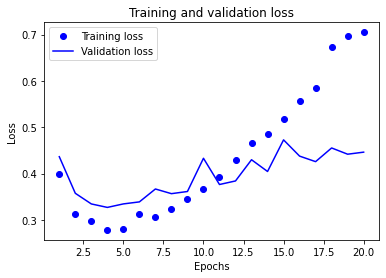

<Figure size 432x288 with 0 Axes>

In [29]:
from keras import regularizers
tf.random.set_seed(18)
l2_model = models.Sequential()
l2_model.add(layers.Dense(16, kernel_regularizer=regularizers.l2(0.001),
                          activation='relu', input_shape=(10000,)))
l2_model.add(layers.Dense(16, kernel_regularizer=regularizers.l2(0.001),
                          activation='relu'))
l2_model.add(layers.Dense(1, activation='sigmoid'))

l2_model.compile(optimizer='rmsprop',
                 loss='binary_crossentropy',
                 metrics=['acc'])

l2_model_hist = l2_model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))



l2_model_hist_dict = l2_model_hist.history
print(l2_model_hist_dict.keys())

#Plot the training and validation loss side by side, as well as the training and validation accuracy:

import matplotlib.pyplot as plt

l2_model_hist_accuracy = l2_model_hist.history['acc']
l2_model_hist_val_accuracy = l2_model_hist.history['val_acc']
l2_model_hist_loss = l2_model_hist.history['loss']
l2_model_hist_val_loss = l2_model_hist.history['val_loss']

epochs = range(1, len(l2_model_hist_accuracy) + 1)


# "bo" is for "blue dot"
plt.plot(epochs, orig_val_loss, 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, l2_model_hist_val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

plt.clf()  

### 5.2 Impact of L2 Regularization Penalty:




As we can see above , the validation loss seems to be almost consistent with the values  and therefore more resistant to overfitting.

This might  possibly happen that all values go towards the mean reducing all values in the predicted matrix including the ones used by the cross entropy or a tiny regularization will reduce variance within the predicted numbers.

*Reference*:https://stats.stackexchange.com/questions/408507/constant-validation-loss-and-increasing-validation-accuracy



##**5.3 Dropout** **Regularization**

It is a simple way to Prevent Neural Networks from Overfitting because the outputs of a layer under **dropout are randomly subsampled**, it has the effect of reducing the capacity or thinning the network during training. As such, a wider network, e.g. more nodes, may be required when using dropout.
Dropout regularization is a **generic approach**.

Like other regularization methods, dropout is more effective on those problems where there is a limited amount of training data and the model is likely to overfit the training data.
# how it works?

**Deciding the hyper parameter** : 

* The default interpretation of the dropout hyperparameter is the probability of training a given node in a layer, where **1.0 means no dropout**, and **0.0 means no outputs from the layer**.

* A good value for dropout in a hidden layer is **between 0.5 and 0.8**. Input layers use a larger dropout rate, such as of 0.8.

**Process**:

 * The outputs of a layer under dropout are randomly subsampled, it has the effect of reducing the capacity or thinning the network during training. As such, a wider network, e.g. more nodes, may be required when using dropout.

* During training, some number of layer outputs are randomly ignored or “dropped out.” This has the effect of making the layer look-like and be treated-like a layer with a different number of nodes and connectivity to the prior layer. In effect, each update to a layer during training is performed with a different “view” of the configured layer.









*Reference*:https://machinelearningmastery.com/dropout-for-regularizing-deep-neural-networks/

Epoch 1/20
49/49 [==============================] - 3s 60ms/step - loss: 0.6568 - acc: 0.6092 - val_loss: 0.4854 - val_acc: 0.8525
Epoch 2/20
49/49 [==============================] - 2s 39ms/step - loss: 0.4965 - acc: 0.7936 - val_loss: 0.3808 - val_acc: 0.8744
Epoch 3/20
49/49 [==============================] - 2s 36ms/step - loss: 0.3996 - acc: 0.8537 - val_loss: 0.3233 - val_acc: 0.8842
Epoch 4/20
49/49 [==============================] - 2s 36ms/step - loss: 0.3293 - acc: 0.8833 - val_loss: 0.3140 - val_acc: 0.8856
Epoch 5/20
49/49 [==============================] - 2s 36ms/step - loss: 0.2930 - acc: 0.9040 - val_loss: 0.2934 - val_acc: 0.8830
Epoch 6/20
49/49 [==============================] - 2s 37ms/step - loss: 0.2627 - acc: 0.9129 - val_loss: 0.3034 - val_acc: 0.8857
Epoch 7/20
49/49 [==============================] - 2s 36ms/step - loss: 0.2367 - acc: 0.9252 - val_loss: 0.3064 - val_acc: 0.8847
Epoch 8/20
49/49 [==============================] - 2s 35ms/step - loss: 0.2209 - a

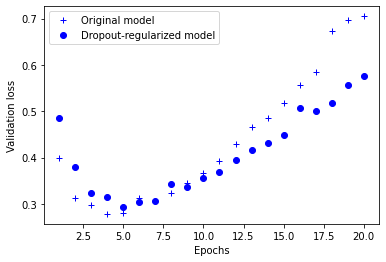

In [31]:
# At training time: we drop out 50% of the units in the output

tf.random.set_seed(21)

dpt_model = models.Sequential()
dpt_model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
dpt_model.add(layers.Dropout(0.5))
dpt_model.add(layers.Dense(16, activation='relu'))
dpt_model.add(layers.Dropout(0.5))
dpt_model.add(layers.Dense(1, activation='sigmoid'))

dpt_model.compile(optimizer='rmsprop',
                  loss='binary_crossentropy',
                  metrics=['acc'])

dpt_model_hist = dpt_model.fit(x_train, y_train,
                               epochs=20,
                               batch_size=512,
                               validation_data=(x_test, y_test))

dpt_model_val_loss = dpt_model_hist.history['val_loss']

plt.plot(epochs, orig_val_loss, 'b+', label='Original model')
plt.plot(epochs, dpt_model_val_loss, 'bo', label='Dropout-regularized model')
plt.xlabel('Epochs')
plt.ylabel('Validation loss')
plt.legend()

plt.show()


###5.4 Impact of Dropout Regularlization:
This shows a **real improvement**  in the performance of the model.
Problem of overfitting has been handled properly as we can see that difference between training loss and validation loss has  been reduced .
This approach  which helps in **reducing interdependent learning** amongst the neurons has helped to **solve the the problem of overfitting**.

---



---

